# NAME: ANSAH KELVIN 

# INDEX NUMBER: 8672421

# MET 3

In [1]:
import xarray as xr
import  matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cf

import warnings
warnings.filterwarnings('ignore')

in_file='Africa_cru_data.nc'

In [2]:
data=xr.open_dataset(in_file)
data

<xarray.Dataset>
Dimensions:  (lon: 150, lat: 146, time: 1440)
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Data variables:
    pre      (time, lat, lon) float32 ...
    stn      (time, lat, lon) float64 ...
Attributes:
    Conventions:  CF-1.4
    title:        CRU TS4.05 Precipitation
    institution:  Data held at British Atmospheric Data Centre, RAL, UK.
    source:       Run ID = 2103051243. Data generated from:pre.2103041709.dtb
    history:      Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegri...
    references:   Information on the data is available at http://badc.nerc.ac...
    comment:      Access to these data is available to any registered CEDA user.
    contact:      support@ceda.ac.uk

In [3]:
data.info()

xarray.Dataset {
dimensions:
	lon = 150 ;
	lat = 146 ;
	time = 1440 ;

variables:
	float32 lon(lon) ;
		lon:long_name = longitude ;
		lon:units = degrees_east ;
	float32 lat(lat) ;
		lat:long_name = latitude ;
		lat:units = degrees_north ;
	datetime64[ns] time(time) ;
		time:long_name = time ;
	float32 pre(time, lat, lon) ;
		pre:long_name = precipitation ;
		pre:units = mm/month ;
		pre:correlation_decay_distance = 450.0 ;
	float64 stn(time, lat, lon) ;
		stn:description = number of stations contributing to each datum ;

// global attributes:
	:Conventions = CF-1.4 ;
	:title = CRU TS4.05 Precipitation ;
	:institution = Data held at British Atmospheric Data Centre, RAL, UK. ;
	:source = Run ID = 2103051243. Data generated from:pre.2103041709.dtb ;
	:history = Fri  5 Mar 14:41:58 GMT 2021 : User harry : Program makegridsauto.for called by update.for ;
	:references = Information on the data is available at http://badc.nerc.ac.uk/data/cru/ ;
	:comment = Access to these data is available t

In [4]:
precip=data.pre
precip

<xarray.DataArray 'pre' (time: 1440, lat: 146, lon: 150)>
[31536000 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -19.75 -19.25 -18.75 -18.25 ... 53.75 54.25 54.75
  * lat      (lat) float32 -34.75 -34.25 -33.75 -33.25 ... 36.75 37.25 37.75
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [5]:
ghana_data=precip.sel(
    lon=slice(-3.5,1.5),
    lat=slice(4.5,11.5))
ghana_data

<xarray.DataArray 'pre' (time: 1440, lat: 14, lon: 10)>
[201600 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * time     (time) datetime64[ns] 1901-01-16 1901-02-15 ... 2020-12-16
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [6]:
# Calculate monthly climatology
#calculates the monthly climatology for Ghana by grouping the data by month,
#along the time dimension and then taking the mean for each month.
monthly_climatology_ghana = ghana_data.groupby('time.month').mean('time')
monthly_climatology_ghana


<xarray.DataArray 'pre' (month: 12, lat: 14, lon: 10)>
array([[[         nan,  30.634163  ,  31.482506  , ...,          nan,
                  nan,          nan],
        [ 28.632502  ,  28.305828  ,  26.761663  , ...,          nan,
                  nan,          nan],
        [ 22.82      ,  22.220835  ,  21.745836  , ...,  16.872496  ,
          27.467495  ,          nan],
        ...,
        [  2.2308335 ,   0.6691666 ,   1.3508337 , ...,   0.        ,
           0.        ,   0.        ],
        [  1.4183335 ,   0.6583332 ,   0.63249993, ...,   0.        ,
           0.        ,   0.        ],
        [  0.59333324,   0.5916666 ,   0.5108333 , ...,   0.        ,
           0.        ,   0.        ]],

       [[         nan,  53.289997  ,  54.687508  , ...,          nan,
                  nan,          nan],
        [ 58.653316  ,  62.546658  ,  60.55584   , ...,          nan,
                  nan,          nan],
        [ 61.935844  ,  64.80999   ,  64.61167   , ...,  33.688335  ,
          57.233334  ,          nan],
...
        [ 13.0725    ,  11.400831  ,  12.564169  , ...,   8.321665  ,
           8.515834  ,   8.879166  ],
        [ 10.802501  ,   7.9799986 ,   8.1875    , ...,   4.512502  ,
           4.77      ,   4.575002  ],
        [  8.031668  ,   6.5458326 ,   5.3450003 , ...,   3.2558336 ,
           3.3733351 ,   2.2025003 ]],

       [[         nan,  60.40751   ,  58.040005  , ...,          nan,
                  nan,          nan],
        [ 51.64249   ,  49.78501   ,  46.67667   , ...,          nan,
                  nan,          nan],
        [ 39.801655  ,  38.633324  ,  38.289997  , ...,  28.200003  ,
          38.81084   ,          nan],
        ...,
        [  3.8758333 ,   3.8491664 ,   3.3708348 , ...,   3.089167  ,
           3.3100007 ,   2.4425    ],
        [  2.445     ,   2.3883333 ,   1.6775006 , ...,   1.7241666 ,
           1.9608334 ,   0.6708334 ],
        [  1.7491665 ,   1.6675001 ,   1.5399997 , ...,   0.9750001 ,
           1.0625001 ,   0.52166665]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

In [7]:
# Define a function to map months to seasons
# month_to_season() maps each month to its corresponding season 
#(DJF, MAM, JJA, SON).
def month_to_season(month):
    if month in [12, 1, 2]:
        return 'DJF'
    elif month in [3, 4, 5]:
        return 'MAM'
    elif month in [6, 7, 8]:
        return 'JJA'
    elif month in [9, 10, 11]:
        return 'SON'

# Apply the function to create a new 'season' coordinate
#month_to_season() function to create a new coordinate 'season' based on the months in the dataset.
monthly_climatology_ghana.coords['season'] = ('month', [month_to_season(month) for month in np.arange(1, 13)])


In [8]:

# Calculate seasonal climatology (e.g., DJF, MAM, JJA, SON)
seasonal_climatology_ghana = monthly_climatology_ghana.groupby('season').mean('month')
seasonal_climatology_ghana

<xarray.DataArray 'pre' (season: 4, lat: 14, lon: 10)>
array([[[           nan, 4.81105537e+01, 4.80700073e+01, 4.76863976e+01,
         4.74949951e+01,            nan,            nan,            nan,
                    nan,            nan],
        [4.63094368e+01, 4.68791656e+01, 4.46647224e+01, 3.80569496e+01,
         3.27916679e+01, 3.02583370e+01, 4.30116615e+01,            nan,
                    nan,            nan],
        [4.15191650e+01, 4.18880501e+01, 4.15491676e+01, 3.93136177e+01,
         3.74694481e+01, 3.41361084e+01, 2.87547169e+01, 2.62536106e+01,
         4.11705589e+01,            nan],
        [3.40008354e+01, 3.68705482e+01, 3.90591736e+01, 3.84972267e+01,
         3.84494438e+01, 3.67124977e+01, 3.47452812e+01, 3.32286110e+01,
         2.96877766e+01, 2.42522221e+01],
        [2.84024963e+01, 3.01066666e+01, 3.29124947e+01, 3.52008400e+01,
         3.51088943e+01, 3.25330544e+01, 3.07069416e+01, 3.37216682e+01,
         3.40533333e+01, 2.65324993e+01],
        [2.38191681e+01, 2.41027756e+01, 2.45636158e+01, 2.67088909e+01,
         2.69058399e+01, 2.49930573e+01, 2.28391666e+01, 2.41972218e+01,
         2.88183346e+01, 2.07974949e+01],
        [1.83372250e+01, 1.91852779e+01, 1.76791668e+01, 1.85524998e+01,
         1.86619473e+01, 1.71266651e+01, 1.40097246e+01, 1.59908342e+01,
...
         1.25980537e+02, 1.25389458e+02, 1.26881950e+02, 1.27266670e+02,
         1.24042213e+02, 1.12003044e+02],
        [1.18159454e+02, 1.19022789e+02, 1.19339470e+02, 1.19884735e+02,
         1.21833038e+02, 1.22711113e+02, 1.26046944e+02, 1.26702209e+02,
         1.26383583e+02, 1.16604713e+02],
        [1.14030823e+02, 1.13496101e+02, 1.14179993e+02, 1.15976929e+02,
         1.16299171e+02, 1.18481956e+02, 1.22661377e+02, 1.24175568e+02,
         1.28140579e+02, 1.22263306e+02],
        [1.06950005e+02, 1.05782494e+02, 1.07549164e+02, 1.09401390e+02,
         1.09414711e+02, 1.12026398e+02, 1.14698616e+02, 1.16914703e+02,
         1.21412788e+02, 1.21613045e+02],
        [9.91566544e+01, 9.87196960e+01, 9.95716858e+01, 1.00143616e+02,
         9.98355713e+01, 1.02124176e+02, 1.04745575e+02, 1.06996101e+02,
         1.08677498e+02, 1.13367226e+02],
        [9.14480591e+01, 9.10850143e+01, 9.16866684e+01, 9.04430542e+01,
         9.18286209e+01, 9.24936142e+01, 9.44285889e+01, 9.72097244e+01,
         9.71324768e+01, 9.83475037e+01],
        [8.45258560e+01, 8.31469498e+01, 8.28836060e+01, 8.26980515e+01,
         8.20216827e+01, 8.31113968e+01, 8.30355606e+01, 8.45424957e+01,
         8.38663864e+01, 8.34761276e+01]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -3.25 -2.75 -2.25 -1.75 ... -0.25 0.25 0.75 1.25
  * lat      (lat) float32 4.75 5.25 5.75 6.25 6.75 ... 9.75 10.25 10.75 11.25
  * season   (season) object 'DJF' 'JJA' 'MAM' 'SON'
Attributes:
    long_name:                   precipitation
    units:                       mm/month
    correlation_decay_distance:  450.0

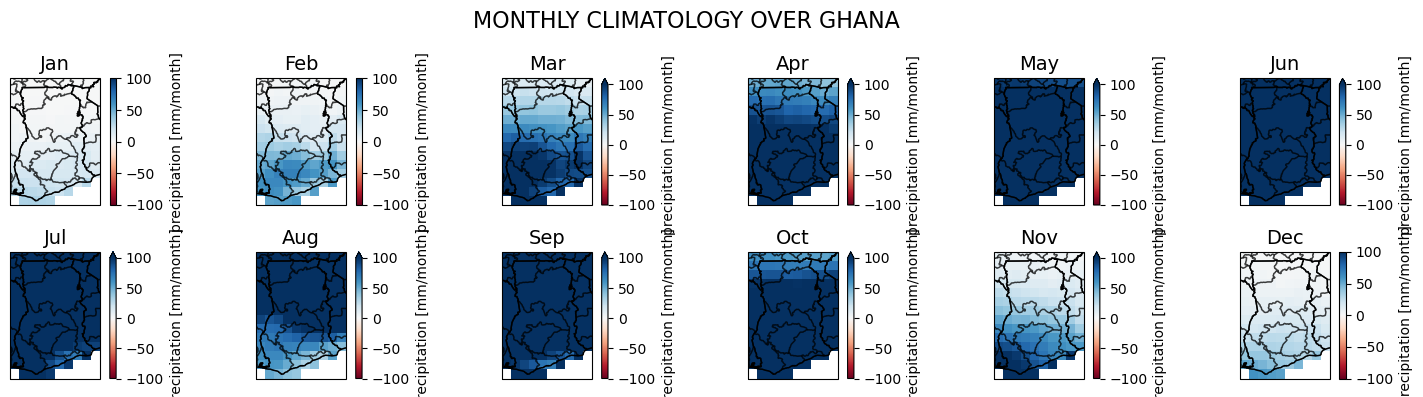

In [9]:
# Plot monthly climatology
plt.figure(143, figsize=(15, 4))  # Specifying the size of the figure #plt.figure(141, figsize=(15, 4)): 
#This creates a new figure with the figure number 141 and sets its size to 15 inches in width and 4 inches in height.

plt.subplots_adjust(wspace=0.5)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
for i, month in enumerate(months):
    plt.subplot(2, 6, i + 1, projection=ccrs.PlateCarree()) # This creates a subplot grid with 2 rows and 6 columns,
    #and for each iteration, it selects a specific subplot using i + 1. It also sets the projection of the subplot to PlateCarree,
    #which is a common projection for geographic data.
    
    monthly_climatology_ghana.sel(month=i + 1).plot(  cmap='RdBu', vmin=-100, vmax=100)
    
    # Add coastlines, borders, and states
    plt.gca().coastlines()
    plt.gca().add_feature(cf.BORDERS)
    plt.gca().add_feature(cf.STATES, alpha=0.5)
    plt.title(month, fontsize=14)


plt.suptitle('MONTHLY CLIMATOLOGY OVER GHANA', fontsize=16)
plt.tight_layout()
plt.show()

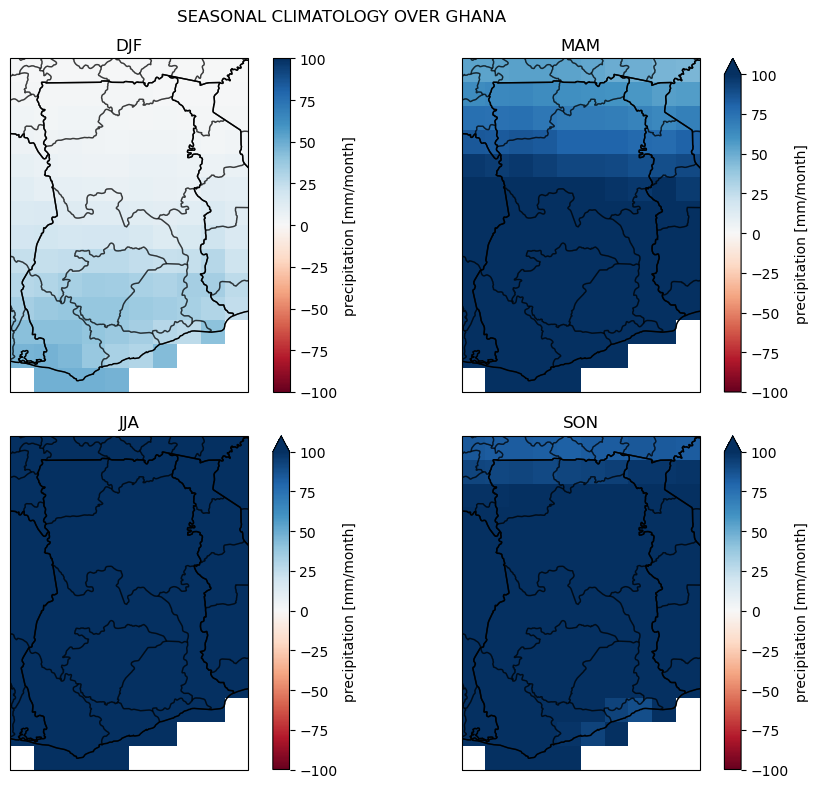

In [10]:
# Plot seasonal climatology
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
seasons = ['DJF', 'MAM', 'JJA', 'SON']
for i, season in enumerate(seasons): #The loop iterates over each season, selects the corresponding subplot, and plots the seasonal climatology.
    ax = axes[i // 2, i % 2]
    ax = plt.subplot(2, 2, i + 1, projection=ccrs.PlateCarree())
    seasonal_climatology_ghana.sel(season=season).plot(ax=ax, cmap='RdBu', vmin=-100, vmax=100)
    ax.set_title(season)

    # Add coastlines, borders, and states for each subplot
    ax.coastlines()
    ax.add_feature(cf.BORDERS)
    ax.add_feature(cf.STATES, alpha=0.5)

plt.suptitle('SEASONAL CLIMATOLOGY OVER GHANA')
plt.tight_layout()
plt.show()